In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
model_name = "tnse_antibac_aac"

name = model_name + '_original_dim_neg.csv'
neg_orig = pd.read_csv(name)

name = model_name + '_origial_dim_pos.csv'
pos_orig = pd.read_csv(name, header=None)

name = model_name + '_reduced_dim_neg.csv'
neg_red = pd.read_csv(name, header=None)

name = model_name + '_reduced_dim_pos.csv'
pos_red = pd.read_csv(name, header=None)

pos_length = pos_red.count()
neg_length = neg_red.count()
original = np.append(pos_orig, neg_orig, axis=0)
reduced = np.append(pos_red, neg_red, axis=0)

In [8]:
pos_length[0]

2895

In [9]:
neg_length[0]

2895

In [5]:
reduced

array([[ 0.        ,  6.75125425,  0.        ,  0.        ],
       [ 0.        , 46.77216351,  0.        ,  0.        ],
       [ 0.        , 24.17092141,  0.        ,  0.        ],
       ...,
       [ 0.        ,  1.02608365,  0.        ,  0.        ],
       [ 0.        ,  9.19582533,  0.        ,  0.        ],
       [ 0.        ,  1.41138701,  0.        ,  0.        ]])

In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5790 samples in 0.008s...
[t-SNE] Computed neighbors for 5790 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5790
[t-SNE] Computed conditional probabilities for sample 2000 / 5790
[t-SNE] Computed conditional probabilities for sample 3000 / 5790
[t-SNE] Computed conditional probabilities for sample 4000 / 5790
[t-SNE] Computed conditional probabilities for sample 5000 / 5790
[t-SNE] Computed conditional probabilities for sample 5790 / 5790
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.594749
[t-SNE] Error after 1000 iterations: 0.299564


NameError: name 'df_tsne' is not defined

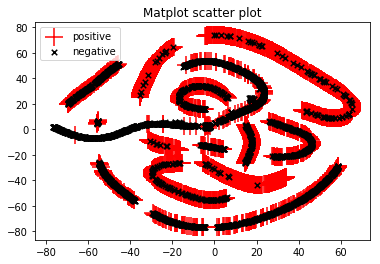

In [17]:
g1 = tsne_results[:pos_length[0],:].T
g2 = tsne_results[pos_length[0]+1:,:].T
data = (g1, g2)
colors = ("red", "black")
groups = ("positive", "negative") 
sizes = (300, 30)
shapes = ("+", "x")
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group, size, shape in zip(data, colors, groups, sizes, shapes):
    x, y = data
    ax.scatter(x, y, alpha=1, c=color, edgecolors='none', s=size, marker=shape, label=group)
 
plt.title('t-sne for last layer of neural network')
plt.legend(loc=2)
plt.show()

In [18]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(original)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5789 samples in 0.011s...
[t-SNE] Computed neighbors for 5789 samples in 1.499s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5789
[t-SNE] Computed conditional probabilities for sample 2000 / 5789
[t-SNE] Computed conditional probabilities for sample 3000 / 5789
[t-SNE] Computed conditional probabilities for sample 4000 / 5789
[t-SNE] Computed conditional probabilities for sample 5000 / 5789
[t-SNE] Computed conditional probabilities for sample 5789 / 5789
[t-SNE] Mean sigma: 1.115925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.912460
[t-SNE] Error after 1000 iterations: 1.967986


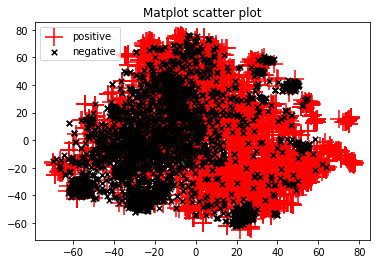

In [19]:
g1 = tsne_results[:pos_length[0],:].T
g2 = tsne_results[pos_length[0]+1:,:].T
data = (g1, g2)
colors = ("red", "black")
groups = ("positive", "negative") 
sizes = (300, 30)
shapes = ("+", "x")
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group, size, shape in zip(data, colors, groups, sizes, shapes):
    x, y = data
    ax.scatter(x, y, alpha=1, c=color, edgecolors='none', s=size, marker=shape, label=group)
 
plt.title('t-sne of the original data')
plt.legend(loc=2)
plt.show()